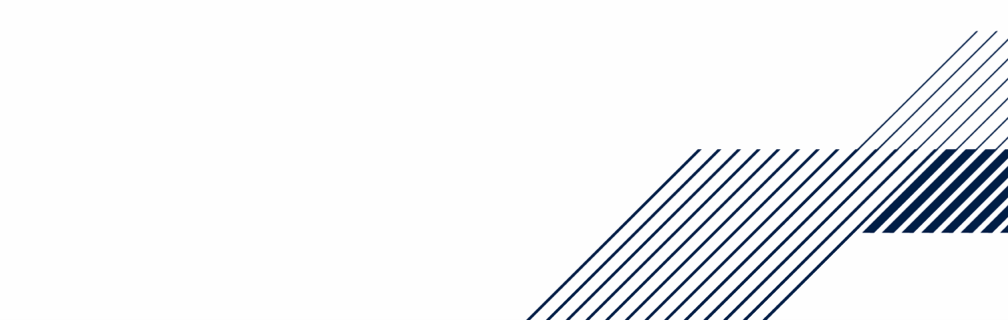<h1>

## 0. Business Case Understanding

### INTRODUCTION

Over the last few years, the music industry has been dominated by digital streaming services, which produce vast amounts of data on listeners and their preferences. 

This has required major players in the industry to adopt a data driven approach to content delivery in order to stay competitive. 

**Warner Music Group is looking to leverage its rich database to better understand the factors that have the most significant impact on the success of a new artist**. This will allow them to optimize the allocation of resources when signing and promoting new artists.

Warner’s (large) database contains several sources of data, including the streaming platforms Spotify, Amazon Live and Apple Music. 

**For this case study, I will be looking using the Spotify dataset** to predict the success of artists. In particular, I want to understand the role of Spotify playlists on the performance of artist.

### Streaming Music

When artists release music digitally, details of how their music is streamed can be closely monitored. 

Some of these details include:

- How listeners found their music (a recommendation, a playlist)
- Where and when (a routine visit to the gym, a party, while working). 
- On what device (mobile / PC)
- And so on…

Spotify alone *process nearly 1 billion streams every day* (Dredge, 2015) and this streaming data is documented in detail every time a user accesses the platform. 

Analyzing this data potentially enables me to gain a much deeper insight into customers’ listening behavior and individual tastes. 

Spotify uses it to drive their recommender systems – these tailor and individualize content as well as helping the artists reach wider and more relevant audiences. 

Warner Music would like to use it to **better understand the factors that influence the future success of its artists**, **identify potentially successful acts** early on in their careers and use this analysis to make resource decisions about how they market and support their artists.

### What are Spotify Playlists and why are relevant today?

A playlist is a group of tracks that you can save under a name, listen to, and update at your leisure. 


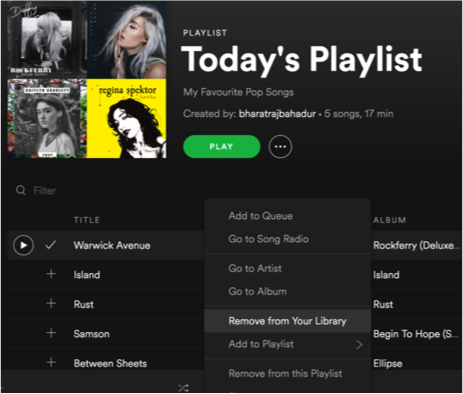

**Figure 1. Screen shot of Spotify product show artists and playlists.**

Spotify currently has more than two billion publicly available playlists, many of which are curated by Spotify’s in-house team of editors. 

The editors scour the web on a daily basis to remain up-to-date with the newest releases, and to create playlists geared towards different desires and needs. 

Additionally, there are playlists such as [Discover Weekly](https://www.spotify.com/uk/discoverweekly/) and [Release Radar](https://support.spotify.com/uk/using_spotify/playlists/release-radar/) that use self-learning algorithms to study a user’s listening behavior over time and recommend songs tailored to his/her tastes.
	
The figure below illustrates the progression of artists on Spotify Playlists:

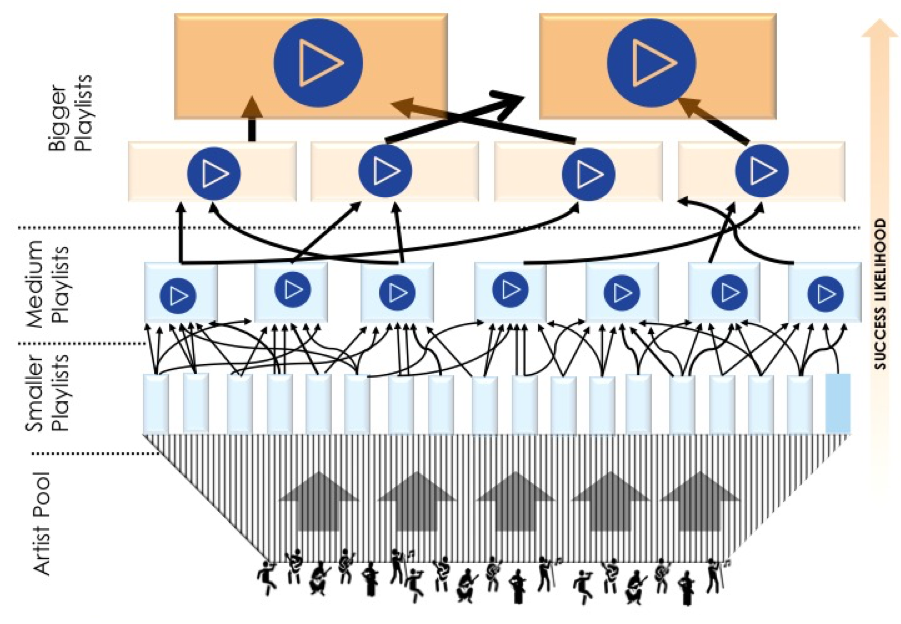

**Figure 2. Figure to illustarte selecting artists and building audience profiles over progressively larger audiences of different playlists. **

The artist pool starts off very dense at the bottom, as new artists are picked up on the smaller playlists, and thins on the way to the top, as only the most promising of them make it through to more selective playlists. The playlists on the very top contain the most successful, chart-topping artists.

**An important discovery that has been made is that certain playlists have more of an influence on the popularity, stream count and future success of an artist than others**

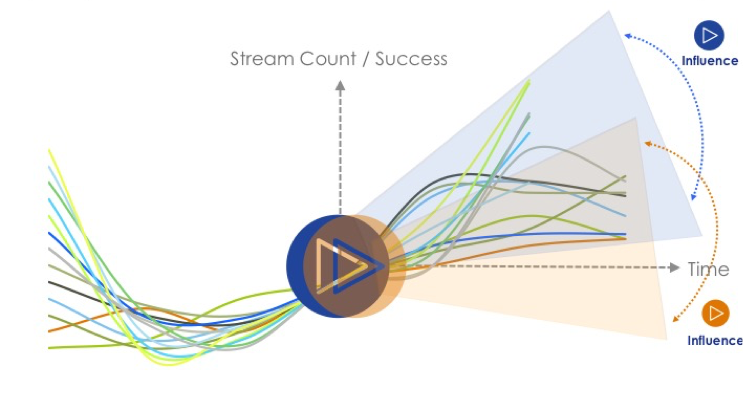

** Figure 3. Figure to illustrate taking song stream data and using it to predict the trajectory, and likely success, of Warner artists. **

Moreover, some playlists have been seen to be pivotal in the careers of successful artists. **Artists that do make it onto one of these *key* playlists frequently go on to become highly ranked in the music charts.**


It is the objective of Warner’s [A&R](https://en.wikipedia.org/wiki/Artists_and_repertoire) team to identify and sign artists before they achieve this level of success i.e. before they get selected for these playlists, in order to increase their ROI. 

In other words, we want to find the artists most likely to make it to one of these 'big playlists'

In ML terms, this means creating a predicitve model to assess which artists will most likely end up on one of these playlists. The 4 target playlists are outlined in following sections

### BUSINESS PROBLEM → DATA PROBLEM

Now that I have a better understanding of the business problem, I can begin to think about how we could model this problem using data. 

The first thing I can do is defining a criterion for measuring artist success. 

Based on our business problem, one way in which I can do this is to create a binary variable representing the success / failure of an artist and determined by whether a song ends up on a key playlist (1), or not (0). I can then generate features for that artist to determine the impact they have on the success of an artist.

My problem thus becomes a classification task, which can be modeled as follows:

### *Artist Feature 1 + Artist Feature 2 …. + Artist Feature N = Probability of Success*

where,

**Success (1) = Artist Features on Key Playlist**

The key playlists I will use for this case study are the 4 listed below, as recommended by Warner Analysts:

1.	Hot Hits UK
2.	Massive Dance Hits
3.	The Indie List
4.	New Music Friday


The project task is to take a look at the Spotify dataset to see how I might be able to set up this classification model.
<br>

## 1. Preparing the problem 

In [1]:
# Preamble 

#import sherlockml.datasets as sfs
import pandas as pd
import random

#sfs.get('/input/spotfunc.py', 'spotfunc.py')
#sfs.get('/input/playlists_ids_and_titles.csv', 'playlists_ids_and_titles.csv')
#sfs.get('/input/newartists2015onwards.csv', 'newartists2015onwards.csv')

# Import all required libraries
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.mlab as mlab
from IPython.display import display, Markdown, Latex
figNo = 1
from pylab import *
import seaborn as sns


# Import custom functions from library, named 'spotfunc'
#import spotfunc as spotfunc_v2




## 2. Data Understanding

<br>
A year’s worth of Spotify streaming data in the WMG database amounts to approximately 50 billion rows of data i.e. 50 billion streams (1.5 to 2 terabytes worth), with a total of seven years of data stored altogether (2010 till today).

For the purposes of this case study, I will be using a sample of this data. The dataset uploaded on the Sherlock server is about 16GB, containing data from 2015 - 2017. Given the limits on RAM and cores, I will be taking a further sample of this data for purposes of this case study: a 10% random sample of the total dataset, saved as 'cleaned_data.csv'. 

*Note: The code for this sampling in included below, but commented out.*

We can begin with reading in the datasets we will need. We will be using 2 files: 
1. Primary Spotify dataset
2. Playlist Name Mapper (only playlist IDs provided in primary dataset)



In [2]:
# %%time
# Sampling data to read in 10% 
# sfs.get('/input/all_artists_with_date_time_detail.csv', 'client-data.csv')
# # Read in data
# # The data to load
# f = 'client-data.csv'
# # Count the lines
# num_lines = sum(1 for l in open(f))
# n = 10
# # Count the lines or use an upper bound
# num_lines = sum(1 for l in open(f))
# # The row indices to skip - make sure 0 is not included to keep the header!
# skip_idx = [x for x in range(1, num_lines) if x % n != 0]
# # Read the data
# data = pd.read_csv(f, skiprows=skip_idx )


Read in the data

In [3]:
%%time
# Read in sampled data. Please change the path here to work with your local machine
data = pd.read_csv('/Users/alitaimurshabbir/Desktop/Predicting Spotify Success/Data/cleaned_data.csv') 
print('rows:',len(data))

# Keep a copy of original data in case of changes made to dataframe
all_artists = data.copy()

# Load playlist data. As before, ensure you change the path accordingly
playlist_ids_and_titles = pd.read_csv('/Users/alitaimurshabbir/Desktop/Spotify Success/Data/playlists_ids_and_titles.csv',encoding = 'latin-1',error_bad_lines=False,warn_bad_lines=False)

# Keep only those with 22 characters (data cleaning)
playlist_mapper = playlist_ids_and_titles[playlist_ids_and_titles.id.str.len()==22].drop_duplicates(['id'])


<string>:2: DtypeWarning: Columns (2,13) have mixed types. Specify dtype option on import or set low_memory=False.


rows: 3805499


FileNotFoundError: [Errno 2] File b'/Users/alitaimurshabbir/Desktop/Spotify Success/Data/playlists_ids_and_titles.csv' does not exist: b'/Users/alitaimurshabbir/Desktop/Spotify Success/Data/playlists_ids_and_titles.csv'

<div class="alert alert-info" role="alert">
    
I can begin by taking a look at what the spotify data looks like. I am going to use several different methods to gain a better elementary understanding.

</div>

In [4]:
data.head(2)

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,day,log_time,mobile,track_id,isrc,upc,artist_name,...,hour,minute,week,month,year,date,weekday,weekday_name,playlist_id,playlist_name
0,0,9,"('small_artists_2016.csv', 9)",10,20160510T12:15:00,True,8f1924eab3804f308427c31d925c1b3f,USAT21600547,7.567991e+10,Sturgill Simpson,...,12,15,19,5,2016,2016-05-10,1,Tuesday,NaN,NaN
1,1,19,"('small_artists_2016.csv', 19)",10,20160510T12:15:00,True,8f1924eab3804f308427c31d925c1b3f,USAT21600547,7.567991e+10,Sturgill Simpson,...,12,15,19,5,2016,2016-05-10,1,Tuesday,NaN,NaN


In [5]:
# find the data types of features

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3805499 entries, 0 to 3805498
Data columns (total 45 columns):
Unnamed: 0           int64
Unnamed: 0.1         int64
Unnamed: 0.1.1       object
day                  int64
log_time             object
mobile               bool
track_id             object
isrc                 object
upc                  float64
artist_name          object
track_name           object
album_name           object
customer_id          object
postal_code          object
access               object
country_code         object
gender               object
birth_year           float64
filename             object
region_code          object
referral_code        float64
partner_name         object
financial_product    object
user_product_type    object
offline_timestamp    float64
stream_length        float64
stream_cached        float64
stream_source        object
stream_source_uri    object
stream_device        object
stream_os            object
track_uri         

In [6]:
# It is also useful to get a numerical summary

data.describe()

,Unnamed: 0,Unnamed: 0.1,day,upc,birth_year,referral_code,offline_timestamp,stream_length,stream_cached,source,hour,minute,week,month,year,weekday
count,3.805499e+06,3.805499e+06,3805499.0,3.805499e+06,3.795478e+06,0.0,0.0,3.805499e+06,0.0,0.0,3.805499e+06,3.805499e+06,3.805499e+06,3.805499e+06,3.805499e+06,3.805499e+06
mean,1.902749e+06,1.902750e+07,10.0,2.389062e+11,1.990107e+03,NaN,NaN,1.891587e+02,NaN,NaN,1.373665e+01,2.254671e+01,2.316008e+01,5.970407e+00,2.016437e+03,2.837800e+00
std,1.098553e+06,1.098553e+07,0.0,2.757391e+11,1.068282e+01,NaN,NaN,6.105546e+01,NaN,NaN,5.400456e+00,1.675157e+01,1.320996e+01,3.036840e+00,5.964080e-01,2.001057e+00
min,0.000000e+00,9.000000e+00,10.0,1.686134e+10,1.867000e+03,NaN,NaN,3.000000e+01,NaN,NaN,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,2.014000e+03,0.000000e+00
25%,9.513745e+05,9.513754e+06,10.0,7.567991e+10,1.987000e+03,NaN,NaN,1.720000e+02,NaN,NaN,1.000000e+01,1.500000e+01,1.400000e+01,4.000000e+00,2.016000e+03,1.000000e+00
50%,1.902749e+06,1.902750e+07,10.0,1.902958e+11,1.993000e+03,NaN,NaN,2.000000e+02,NaN,NaN,1.400000e+01,3.000000e+01,2.300000e+01,6.000000e+00,2.016000e+03,3.000000e+00
75%,2.854124e+06,2.854124e+07,10.0,1.902960e+11,1.997000e+03,NaN,NaN,2.240000e+02,NaN,NaN,1.800000e+01,4.500000e+01,3.200000e+01,8.000000e+00,2.017000e+03,5.000000e+00
max,3.805498e+06,3.805499e+07,10.0,5.414940e+12,2.017000e+03,NaN,NaN,9.000000e+02,NaN,NaN,2.300000e+01,4.500000e+01,5.000000e+01,1.200000e+01,2.017000e+03,6.000000e+00


<div class="alert alert-info">

*An additional idea is to check for missing values*

</div>

In [7]:
data.isnull().sum()

Unnamed: 0                 0
Unnamed: 0.1               0
Unnamed: 0.1.1             0
day                        0
log_time                   0
mobile                     0
track_id                   0
isrc                       4
upc                        0
artist_name                0
track_name                 0
album_name                 0
customer_id                0
postal_code          1352181
access                     0
country_code               0
gender                 40422
birth_year             10021
filename                   0
region_code           261956
referral_code        3805499
partner_name         3378646
financial_product    2329099
user_product_type      22992
offline_timestamp    3805499
stream_length              0
stream_cached        3805499
stream_source              0
stream_source_uri    2761628
stream_device              0
stream_os                  0
track_uri                  0
track_artists              0
source               3805499
DateTime      

<div class="alert alert-info">
    
*This analysis shows that I am missing entries for postal code in a great number of cases, and for nearly all cases of the Stream Source URI. I may need to deal with this later*

</div>

Each row in the data is a unique stream – every time a user streams a song in the Warner Music catalogue for at least 30 seconds it becomes a row in the database. Each stream counts as a ‘transaction’, the value of which is £0.0012, and accordingly, 1000 streams of a song count as a ‘sale’ (worth £1) for the artist. The dataset is comprised of listeners in Great Britain only.

Not all the columns provided are relevant to me. Lets take a look at some basic properties of the dataset, and identify the columns that are important for this study


The columns I should focus on for this case study are:

* Log Time – timestamp of each stream
* Artist Name(s) – some songs feature more than one artist
* Track Name
* ISRC - (Unique code identifier for that version of the song, i.e. radio edit, album version, remix etc.)
* Customer ID
* Birth Year
* Location of Customer
* Gender of Customer
* Stream Source URI – where on Spotify was the song played – unique playlist ID, an artist’s page, an album etc.


### EXPLORATORY ANALYSIS AND PLOTS


Now I will look at the data set in more detail. 

<div class = "alert alert-info">

*I am going to visualise and explore the following set of variables:*

- *Age*
- *Gender*
- *Streams by month and weekday*
- *Most popular playlists*

</div>

<div class="alert alert-info">
    
**Age**

- *create an **'Age'** variable to make it easier to interpret*

- *drop missing values for 'Age'*

- *visualise the distribution of 'Age'*


</div>

In [8]:
data['birth_year'] = 2017 - data['birth_year']
data.rename(columns = {'birth_year':'age'}, inplace = True)

In [9]:
data['age']= data['age'].dropna()

In [10]:
data['age'].dropna(inplace = True)

In [11]:
data['age'].isna().sum()

0

In [12]:
data['age'].describe()

count    3.795478e+06
mean     2.689286e+01
std      1.068282e+01
min      0.000000e+00
25%      2.000000e+01
50%      2.400000e+01
75%      3.000000e+01
max      1.500000e+02
Name: age, dtype: float64

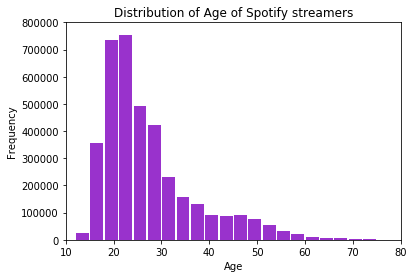

In [13]:
#I restrict the x-axis range to an upper limit of 80, instead of the max age of 150 because the frequency of ages past 80 is minimal and
#restriction gives us a much clearer view of distribution

plt.hist(data['age'], bins = 50,color = 'darkorchid', rwidth = 0.9)

plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age of Spotify streamers')
plt.axis([10, 80, 0, 800000])
plt.grid(False)

In [14]:
#As expected, Spotify's customers are heavily skewed towards younger individuals

<div class="alert alert-info">

**Gender**

</div>

In [15]:
#get number of unique male and female streamers

unique_genders = data[['customer_id', 'gender']]
unique_genders = unique_genders.groupby('gender').nunique()
unique_genders = unique_genders.drop('gender', axis=1)
unique_genders = unique_genders.rename(columns = {'customer_id':'Split'})

In [16]:
unique_genders

,Split
gender,
female,1076907
male,994741


array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a1c678ed0>],
      dtype=object)

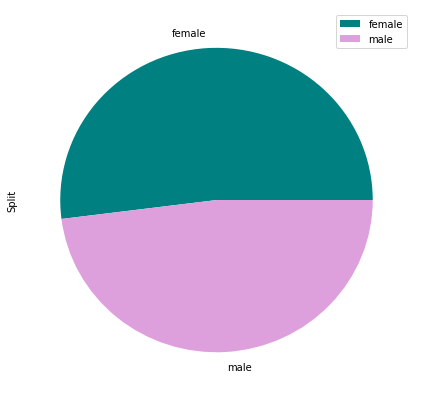

In [17]:
unique_genders.plot(kind='pie', subplots=True, colors = ['teal', 'plum'], figsize=(7, 7))

# females slightly outnumber males, but not to the extent of introducing an imbalance

<div class = "alert alert-info">
    
**Stream frequency by weekday and month**

<div>

Text(0.5,0,'# of streams')

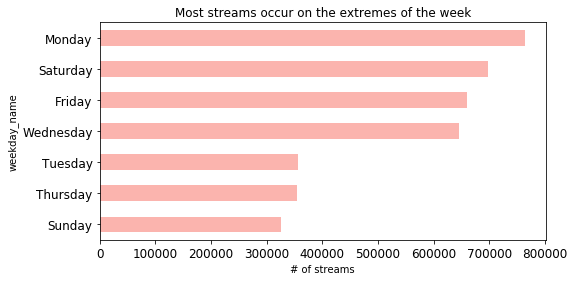

In [18]:
# streams by weekday

streams_by_day = data.groupby('weekday_name').count()
streams_by_day['Weekday'] = streams_by_day.index
streams_by_day =  streams_by_day.sort_values('day')
streams_by_day_plot = streams_by_day[['Weekday', 'day']].plot(kind='barh', color= plt.cm.Pastel1(np.arange(len(streams_by_day))), title = 'Most streams occur on the extremes of the week', figsize = (8, 4), legend = False, fontsize = 12)
streams_by_day_plot.set_xlabel('# of streams')

In [19]:
# streams by month

streams_by_month = data.groupby('month').count()
streams_by_month['Month'] = streams_by_month.index
streams_by_month =  streams_by_month.sort_values('year')

Text(0.5,0,'# of streams')

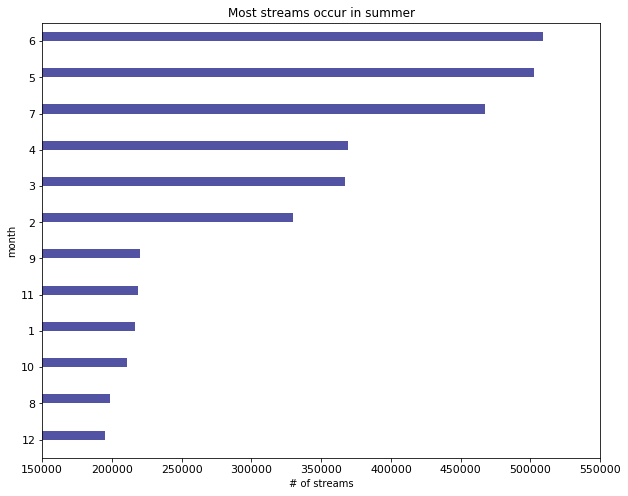

In [20]:
streams_by_month_plot = streams_by_month[['Month', 'day']].plot(kind='barh', color= plt.cm.tab20b(np.arange(len(streams_by_day))), title = 'Most streams occur in summer', figsize = (10, 8), legend = False, fontsize = 11)
streams_by_month_plot .set_xlim((150000, 550000))
streams_by_month_plot.set_xlabel("# of streams")


<div class = "alert alert-info">
    
*The motivation behind these plots is as follows. It is likely that, as a whole, certain kinds of songs are more popular in certain parts of the year, and this may factor into whether or not an artist is successful. This is because artists release songs pertaining only to 2 or 3 genres normally.*

<br>

*For example, it is usually the case that songs beloning to the 'dance', 'pop', 'electronic' and 'party' genres are played much more during the summer than they are in winter. Similarly, Christmas songs will be played more often in the winter months.*

<br>

*My visualisation shows us that, by far, most songs are indeed streamed in the summer, and at the end (leisure time) and beginning of the week. On Mondays, it is possible that a significant portion of streams is related to users exercising at a gym, as people tend to exercise on a Monday to have a 'positive start' to the week. Again, certain kinds of songs may be more popular when it comes to physical activity.*

</div>

<div class = "alert alert-info">
    
**Most popular playlists**

<div>

In [21]:
playlist_data = DataFrame(data['playlist_name'].value_counts())
playlist_data = playlist_data.drop(playlist_data.index[7:] )
playlist_data = playlist_data.rename(columns = {'playlist_name':'Number of streams'})

(10000, 230000)

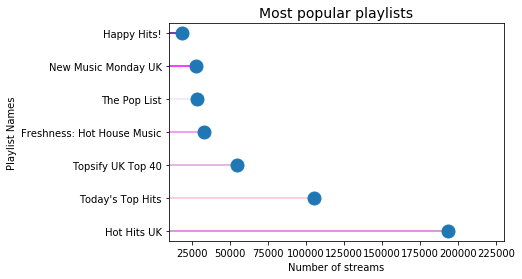

In [22]:
# create lollipop plot

my_range=range(1,len(playlist_data.index)+1)
 
import seaborn as sns


Colours = ['orchid','pink','plum','violet',
              'lavender','fuchsia','indigo']

plt.hlines(y=my_range, xmin=0, xmax=playlist_data['Number of streams'], color=Colours)
plt.plot(playlist_data['Number of streams'], my_range, "o", markersize = 13)
plt.rcParams["figure.figsize"] = [12,8]
 

plt.yticks(my_range, playlist_data.index)
plt.title("Most popular playlists", loc='center', size = 14)
plt.xlabel('Number of streams')
plt.ylabel('Playlist Names')
plt.xlim(left = 10000, right = 230000)

<div class = "alert alert-info">
    
*Intrestingly, of the 4 key playlists outlined by Warner analysts, only 1 (Hot Hits UK) is among the most popular playlists by number of streams.*

<br>

*We are unsure as to why said analysts recommended the paylists they did, but do believe that they had valid reasons for doing so.*

<br>

*This may point to the idea that number of streams per playlist, while an important factor, is not given a hugely significant amount of weight by Warner's analysts. In turn, this may better inform our understanding of what features to include in the final model.*

</div>

-- --

## 3.	Data Preperation and Feature Engineering
<br>
From our business understanding, I know that our criteria for success is whether or not an artist has been on one of 4 key playlists.  The column ‘stream_source_uri’, contains data about the source of the stream – whether it was from an artist’s page, an album, a playlist etc. 

For streams coming from different playlists, only the Spotify URI code is provided. To make sense of this column and identify our key playlists, I can use the additional table provided that we cleaned above and named 'playlist_mapper'.

We can being by out data preperation by subsetting the 4 key playlists we are interested in and creating our dependent variable:

** Create Dependent Variable **

<div class="alert alert-info">
    
*Each source has a unique uri. Since the stream source uri gives us a tonne of missing values, I am going to use the playlist_id name instead. The key playlists we will use for this case study are the 4 listed below, as recommended by Warner Analysts:*

<br>


- *Hot Hits UK*
- *Massive Dance Hits*
- *The Indie List*
- *New Music Friday*

</div>

In [23]:
# select relevant playlists 

target_playlists = ['Hot Hits UK', 'Massive Dance Hits', 'The Indie List', 'New Music Friday']

#return a filtered view of main dataframe 'data' where only target playlists are shown:

data.loc[data["playlist_name"].isin(target_playlists), ].head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,day,log_time,mobile,track_id,isrc,upc,artist_name,...,hour,minute,week,month,year,date,weekday,weekday_name,playlist_id,playlist_name
633,633,6339,"('small_artists_2016.csv', 6339)",10,20160410T12:45:00,False,db62b1d507bc4fd1bc8b4785d82d6356,USAT21601204,7.567991e+10,Vinyl on HBO,...,12,45,14,4,2016,2016-04-10,6,Sunday,6FfOZSAN3N6u7v81uS7mxZ,Hot Hits UK
17270,17270,172709,"('small_artists_2016.csv', 172709)",10,20160210T18:30:00,False,bcdbf945cb194356b39ec0d36476e641,AUUQU1600001,8.256463e+11,Xavier Dunn,...,18,30,6,2,2016,2016-02-10,2,Wednesday,6FfOZSAN3N6u7v81uS7mxZ,Hot Hits UK
26996,26996,269969,"('small_artists_2016.csv', 269969)",10,20160710T10:00:00,True,de3c49e047a945aba049b7467f9a20ad,USAT21601112,7.567991e+10,Sir The Baptist,...,10,0,27,7,2016,2016-07-10,6,Sunday,6FfOZSAN3N6u7v81uS7mxZ,Hot Hits UK
29244,29244,292449,"('small_artists_2016.csv', 292449)",10,20160510T17:00:00,False,3ccdfba451974b848e509b3a97b553ba,FR9W11520485,1.902960e+11,Amir,...,17,0,19,5,2016,2016-05-10,1,Tuesday,6FfOZSAN3N6u7v81uS7mxZ,Hot Hits UK
60803,60803,608039,"('small_artists_2016.csv', 608039)",10,20160510T11:15:00,False,5e6ae0c4967047dbb832caec9b1df082,FR43Y1600020,1.902960e+11,Starlovers,...,11,15,19,5,2016,2016-05-10,1,Tuesday,6FfOZSAN3N6u7v81uS7mxZ,Hot Hits UK


In [24]:
# total number of successful and unsuccessful streams

data['Success'] = np.where(data.playlist_name.isin(target_playlists), 1, 0) 
data['Success'].value_counts() 

0    3602720
1     202779
Name: Success, dtype: int64

In [25]:
# number of unique successful artists
data.groupby('Success').artist_name.nunique()

Success
0    661
1     83
Name: artist_name, dtype: int64

<div class = "alert alert-success">
    
 **Create binary dependent variable**
 
 </div>

In [26]:
successful = pd.DataFrame(data.groupby('artist_name').Success.sum())
depvar_df  = pd.DataFrame(successful[successful['Success'] !=0])

In [27]:
successful['Successful Artist or Not'] = np.where(successful['Success'] > 0, 1, 0) # new variable where '0' means unsuccessful and '1' otherwise
successful

,Success,Successful Artist or Not
artist_name,,
#90s Update,0,0
17 Memphis,0,0
2D,0,0
3JS,0,0
99 Percent,0,0
...,...,...
birthday,0,0
dvsn,11,1
flor,9,1


In [28]:
successful = successful.drop('Success', axis = 1)
successful

,Successful Artist or Not
artist_name,
#90s Update,0
17 Memphis,0
2D,0
3JS,0
99 Percent,0
...,...
birthday,0
dvsn,1
flor,1


Now that I have created our dependent variable – whether an artist is successful or not, I can look at generating a set of features, based on the columns within our dataset, that I think might best explain the reasons for this success. 

**FEATURE ENGINEERING**

There are a large number of factors that could have an impact on the success of an artist, such as:

- the influence of a playlist
- the popularity of an artist in a certain geographical region. 

To build a predictive model for this problem, **we first need to turn these (largely qualitative) factors into measurable quantities.** Characteristics like ‘influence’ and ‘popularity’ need to be **quantified and standardized** for all artists, to allow for a fair comparison. 

The accurateness of these numerical estimates will be the fundamental driver of success for any model I build. 
There are many approaches one might take to generate features. Based on the data columns available to me, **a sensible approach is to divide our feature set into three groups:**

1.	Artist Features
2.	Playlist Features
3.	User-base features


## Artist features

*	Stream count
*	Total Number of users
*	Passion Score 

The metric passion score is a metric suggested to us by Warner business analysts. 

It is defined as the number of stream divided by the total number of users. 

Warner analysts believe that repeated listens by a user is a far more indicative future success that simply total number of listens or total unique users. By including this in my model, I can evaluate whether this metric in fact might be of any significance.

In [29]:
#Stream count per artist

streams_per_artist = data.artist_name.value_counts() #getting no. of observations per artist
streams_per_artist = DataFrame(streams_per_artist) #turning it into dataframe
streams_per_artist.reset_index(level = 0, inplace = True) #reset labels
streams_per_artist.columns = ['artist_name', 'streams_count_per_artist'] #add labels



In [30]:
# Number of users per artist

simple_dataframe = data[['artist_name','customer_id']] #create simple dataframe with two columns that I need 
users_per_artist = simple_dataframe.groupby(['artist_name']).nunique() #get the unique number of customer_id per artist

In [31]:
users_per_artist = users_per_artist.drop('artist_name', axis = 1) #remove labels

In [32]:
#Passion score

#merge stream per artist and users per artist dataframes
passion_score_final = streams_per_artist.merge(users_per_artist, how = 'left', left_on = 'artist_name', right_index = True)
passion_score_final.head()

,artist_name,streams_count_per_artist,customer_id
0,Charlie Puth,447873,367023
1,Dua Lipa,315663,260778
2,Lukas Graham,311271,247580
3,Cheat Codes,255820,225658
4,Anne-Marie,247934,220413


In [33]:
#create new column for passion score
passion_score_final['passion_score_final'] = passion_score_final['streams_count_per_artist']/passion_score_final['customer_id']

artist_df = passion_score_final.copy()
artist_df = artist_df.rename(columns = {'customer_id':'streamers_per_artist'})

In [34]:
artist_df.set_index('artist_name', inplace = True) #replace index with artist_name
    

In [35]:
# Quantified artist features dataframe
artist_df

,streams_count_per_artist,streamers_per_artist,passion_score_final
artist_name,,,
Charlie Puth,447873,367023,1.220286
Dua Lipa,315663,260778,1.210466
Lukas Graham,311271,247580,1.257254
Cheat Codes,255820,225658,1.133662
Anne-Marie,247934,220413,1.124861
...,...,...,...
Arsen,1,1,1.000000
Helena Majdaniec,1,1,1.000000
Ugo,1,1,1.000000


## Playlist Features

Understanding **an artist’s growth as a function of his/her movement across different playlists** is potentially key to understanding how to identify and breakout new artists on Spotify. 

In turn, **this could help me identify the most influential playlists and the reasons for their influence.**

One way to model the effect of playlists on an artist’s performance has been to include them as categorical features in our model, **to note if there are any particular playlists or combinations of playlists that are responsible** for propelling an artist to future success:

### *Artist Feature 1 + Artist Feature 2 …. + Artist Feature N = Probability of Success*
**
Success (1) = Artist Features on Key Playlist
Failure (0) = Artist Not Featured on Key Playlist
**

Where,

**
⇒Artist Feature N = Prior Playlist 1 + Prior Playlist 2 +…Prior Playlist N
**


Given that I have over 19,000 playlists in our dataset or 600 artists, using the playlists each artist has featured on, as categorical variables would lead to too many features and a very large, sparse matrix. 

Instead, I need to think of ways to summarize the impact of these playlists. One way to do this would be to consider the top 20 playlists each artist has featured on. 

Even better would be to come up with one metric that captures the net effect of all top 20 prior playlists, for each artist, rather including using all 20 playlists for each artists as binary variables. The intuition here is that if this metric as a whole has an influence on the performance of an artist, it would suggest that rather than the individual playlists themselves, it is a combination of their generalized features that affects the future performance of an artist. 

Accordingly, different combinations of playlists could equate to having the same impact on an artist, thereby allowing me to identify undervalued playlists.

Some of the features such a metric could use is the number of unique users or ‘reach’, number of stream counts, and the passion score of each playlist

* Prior Playlist Stream Counts
* Prior Playlist Unique Users (Reach)
* Prior Playlist Passion Score

There are several other such features that you could generate to better capture the general characteristics of playlists, such as the average lift in stream counts and users they generate for artists that have featured on them. 

The code to calculate these metrics is provided below:

In [36]:
# obtain prior playlist stream counts

playlist_df = data[['playlist_name', 'artist_name', 'customer_id']]
playlist_df = playlist_df.dropna()
playlist_df_1 = playlist_df.dropna()
playlist_df_1 = DataFrame(playlist_df_1.groupby('artist_name').playlist_name.value_counts())

playlist_df_1 = playlist_df_1.rename(columns = {'playlist_name':'Prior Playlist Stream Counts'})
playlist_df_1
 

Prior Playlist Stream Counts
artist_name playlist_name                                                                   
#90s Update After Work House                                                               3
            ENERGY - HIT MUSIC ONLY!                                                       1
17 Memphis  Wild Country                                                                   6
99 Percent  Musical.ly songs                                                               8
            Party Bangers!                                                                 8
...                                                                                      ...
gnash       wake up playlist?                                                              1
            we can hurt together                                                           1
            work out playlist                                                              1
            |Solo Dance - Martin Jensen|Setting Fire - The ...                             1
livetune+   J-Track Makunouchi                                                             1

[18659 rows x 1 columns]

In [37]:
# obtain unique number of streamers per playlist

playlist_df_2 = DataFrame(playlist_df.groupby('playlist_name').customer_id.nunique())
playlist_df_2 = playlist_df_2.rename(columns = {'customer_id':'number of unique streamers'})
playlist_df_2



,number of unique streamers
playlist_name,
SEPTEMBER 2016 TOP HITS,14
2015 Hits,2
2016 Rap ?,5
?Space ?,1
Avicii - Tiësto - Calvin Harris - Alesso - Swedish house mafia - Zedd - Nause - David Guetta - Har,1
...,...
Éxitos de Hoy - Chile,14
Éxitos en acústico,1
Ö3-Hörerplaylist,1


In [38]:
# merge above dataframes
masta = pd.merge(playlist_df_1, playlist_df_2, right_index = True, left_index = True)

In [39]:
# create new column for playlist passion score
masta['Playlist Passion Score'] = (masta['Prior Playlist Stream Counts']/masta['number of unique streamers'])

masta

Prior Playlist Stream Counts  \
artist_name playlist_name                                                                      
#90s Update After Work House                                                               3   
            ENERGY - HIT MUSIC ONLY!                                                       1   
17 Memphis  Wild Country                                                                   6   
99 Percent  Musical.ly songs                                                               8   
            Party Bangers!                                                                 8   
...                                                                                      ...   
gnash       wake up playlist?                                                              1   
            we can hurt together                                                           1   
            work out playlist                                                              1   
            |Solo Dance - Martin Jensen|Setting Fire - The ...                             1   
livetune+   J-Track Makunouchi                                                             1   

                                                                number of unique streamers  \
artist_name playlist_name                                                                    
#90s Update After Work House                                                            43   
            ENERGY - HIT MUSIC ONLY!                                                    31   
17 Memphis  Wild Country                                                               192   
99 Percent  Musical.ly songs                                                            18   
            Party Bangers!                                                             139   
...                                                                                    ...   
gnash       wake up playlist?                                                            4   
            we can hurt together                                                         1   
            work out playlist                                                            1   
            |Solo Dance - Martin Jensen|Setting Fire - The ...                           1   
livetune+   J-Track Makunouchi                                                           2   

                                                                Playlist Passion Score  
artist_name playlist_name                                                               
#90s Update After Work House                                                  0.069767  
            ENERGY - HIT MUSIC ONLY!                                          0.032258  
17 Memphis  Wild Country                                                      0.031250  
99 Percent  Musical.ly songs                                                  0.444444  
            Party Bangers!                                                    0.057554  
...                                                                                ...  
gnash       wake up playlist?                                                 0.250000  
            we can hurt together                                              1.000000  
            work out playlist                                                 1.000000  
            |Solo Dance - Martin Jensen|Setting Fire - The ...                1.000000  
livetune+   J-Track Makunouchi                                                0.500000  

[18659 rows x 3 columns]

In [40]:
# since we have individual passion scores for each playlist an artist shows up in, we can find the mean across these to have one metric per
# artist

# quantified playlist features dataframe
masta1 = masta.groupby('artist_name').agg({'Playlist Passion Score':np.mean})
masta1

,Playlist Passion Score
artist_name,
#90s Update,0.051013
17 Memphis,0.031250
99 Percent,0.458733
A Boogie Wit Da Hoodie,0.362968
A Boogie Wit da Hoodie,0.454769
...,...
birthday,0.500000
dvsn,0.498281
flor,0.189314


## User-base features

I can use the age and gender columns to create an audience profile per artist.
*	Gender Percentage Breakdown
*	Age vector quantization 


<div class="alert alert-info">

**Audience profile per artist by gender**

</div>

In [41]:
data.loc[data.gender=="female","gender_binary"] = 1 #create new column and denote '1' if female
data.loc[data.gender=="male","gender_binary"] = 0 # denote '0' if male

gender_PER = data.groupby(['artist_name']).gender_binary.mean() #'mean' method gives percentage of women

# we omit including percentage of men to avoid perfect multicollinearity

In [42]:
gender_PER = DataFrame(gender_PER)

# clean up dataframe

gender_PER = gender_PER.rename(columns = {'gender_binary':'percentage of females'}) 
gender_PER = gender_PER.rename(columns = {'percentage of females':'percentage of female streamers'})

# merge the above to quantified artist features dataframe 'artist_df' and call the resulting dataframe 'final_df'

final_df = pd.merge(artist_df, gender_PER, right_index = True, left_index = True)
final_df = final_df.rename(columns = {'stream_count_per_artist':'stream cunt per artist', 'streamers_per_artist':'number of unique streamers per artist', 'passion-score_final':'passion score'})

In [43]:
final_df

,streams_count_per_artist,number of unique streamers per artist,passion_score_final,percentage of female streamers
artist_name,,,,
Charlie Puth,447873,367023,1.220286,0.578064
Dua Lipa,315663,260778,1.210466,0.594637
Lukas Graham,311271,247580,1.257254,0.480609
Cheat Codes,255820,225658,1.133662,0.547475
Anne-Marie,247934,220413,1.124861,0.602910
...,...,...,...,...
Arsen,1,1,1.000000,1.000000
Helena Majdaniec,1,1,1.000000,0.000000
Ugo,1,1,1.000000,0.000000


<div class="alert alert-info">
    
*In creating the above, I have not accounted for repeated streams by a female/male customer. This may give a misleading view of our per-artist gender profile. To double-check, I compare the gender split with repeated customers to that with unique customers*

</div>

In [44]:
#with repeated streamers


num_male = len(data[data['gender']=='male'])
num_female = len(data[data['gender']=='female'])

percentage_male_repeat = (num_male/(num_male+num_female)*100)
percentage_female_repeat = (num_female/(num_male+num_female)*100)

print(percentage_male_repeat)
print(percentage_female_repeat)

48.05633457164355
51.94366542835645


In [45]:
unique_genders # taken from exploratory analysis

,Split
gender,
female,1076907
male,994741


In [46]:
#with unique streamers


total_unique_users =  unique_genders.loc['female', 'Split'] + unique_genders.loc['male', 'Split']
percentage_female_unique = (unique_genders.loc['female', 'Split']/total_unique_users)*100
percentage_male_unique= (unique_genders.loc['male', 'Split']/total_unique_users)*100

print(percentage_male_unique)
print(percentage_female_unique)

48.01689283121457
51.98310716878544


<div class = "alert alert-success">
    
 *There is a minimal difference between the gender splits with and without accounting for unique users. Our audience gender profile for each artist is valid.*
 
</div>

<div class="alert alert-info">
    
**Age vector quantisation**

</div>

In [47]:
#Creating bins and labelling them

age_bins_df = data[["artist_name", "customer_id", "age"]]

age_bins_df = age_bins_df.drop_duplicates(subset = ['customer_id'])

bins = [0, 18, 25, 40, 70]
group_names = ['youth', 'young adult', 'adult', 'senior']


In [48]:
age_bins_df['age category'] = pd.cut(x=age_bins_df['age'], bins = bins, labels = group_names) # create bins out of intervals

In [49]:
age_bins_df = age_bins_df.set_index('artist_name') # turning into artist name level dataframe
age_bins_df.head()

,customer_id,age,age category
artist_name,,,
Sturgill Simpson,6c022a8376c10aae37abb839eb7625fe,49.0,senior
Sturgill Simpson,352292382ff3ee0cfd3b73b94ea0ff8f,22.0,young adult
Sturgill Simpson,c3f2b54e76696ed491d9d8f964c97774,25.0,young adult
Sturgill Simpson,6a06a9bbe042c73e8f1a3596ec321636,38.0,adult
Sturgill Simpson,b2078313098854a18fec2d7dcb2b0d73,24.0,young adult


<div class="alert alert-info">
    
*Next I find the number of (each age group) listeners per artist*

</div>

In [50]:
# number of youths
youth = age_bins_df[age_bins_df['age category']=='youth']
youth_count = DataFrame(youth.groupby('artist_name')['age category'].count())
youth_count = youth_count.rename(columns = {'age category':'number of youths'})


In [51]:
# number of young adults
young_adult = age_bins_df[age_bins_df['age category']=='young adult']
young_adult_count = DataFrame(young_adult.groupby('artist_name')['age category'].count())
young_adult_count = young_adult_count.rename(columns = {'age category':'number of young adults'})

In [52]:
# number of adults

adult = age_bins_df[age_bins_df['age category']=='adult']
adult_count = DataFrame(adult.groupby('artist_name')['age category'].count())
adult_count = adult_count.rename(columns = {'age category':'number of adults'})

In [53]:
# number of seniors

senior = age_bins_df[age_bins_df['age category']=='senior']
senior_count = DataFrame(senior.groupby('artist_name')['age category'].count())
senior_count= senior_count.rename(columns = {'age category':'number of seniors'})

In [54]:
# merge into one dataframe

age_vect_df = pd.concat([youth_count, young_adult_count, adult_count, senior_count], axis = 1, sort = 'True').fillna(0)
age_vect_df

,number of youths,number of young adults,number of adults,number of seniors
#90s Update,1.0,3.0,8.0,1.0
17 Memphis,2.0,4.0,3.0,1.0
2D,1.0,0.0,0.0,0.0
3JS,0.0,1.0,1.0,2.0
99 Percent,327.0,353.0,169.0,115.0
...,...,...,...,...
birthday,5.0,8.0,7.0,0.0
dvsn,1775.0,7859.0,5334.0,1028.0
flor,17.0,37.0,35.0,10.0
gnash,16099.0,34695.0,26429.0,9214.0


<div class="alert alert-info">
    
*Find each bin as a share of total streamers*

</div>

In [55]:
age_vect_df['% of youth'] = age_vect_df['number of youths']/(age_vect_df['number of youths'] + age_vect_df['number of young adults'] + age_vect_df['number of adults'] + age_vect_df['number of seniors'])

In [56]:
age_vect_df['% of young adults'] = age_vect_df['number of young adults']/(age_vect_df['number of youths'] + age_vect_df['number of young adults'] + age_vect_df['number of adults'] + age_vect_df['number of seniors'])
age_vect_df['% of adults'] = age_vect_df['number of adults']/(age_vect_df['number of youths'] + age_vect_df['number of young adults'] + age_vect_df['number of adults'] + age_vect_df['number of seniors'])
age_vect_df['% of seniors'] = age_vect_df['number of seniors']/(age_vect_df['number of youths'] + age_vect_df['number of young adults'] + age_vect_df['number of adults'] + age_vect_df['number of seniors'])


In [57]:
# Age vectorised dataframe

share_streamers_by_age = age_vect_df[['% of youth', '% of young adults', '% of adults', '% of seniors']]

# Merge with final_df

final_df = pd.merge(final_df, share_streamers_by_age, right_index = True, left_index = True)

In [58]:
#drop % of seniors to avoid perfect multicollinearity

final_df = final_df.drop('% of seniors', axis = 1)

In [59]:
# Merge playlist featured dataframe with final_df

final_df = pd.merge(final_df, masta1, right_index = True, left_index = True)

In [60]:
final_df = pd.merge(final_df, successful, right_index = True, left_index = True)


In [61]:
final_df.head(2)

,streams_count_per_artist,number of unique streamers per artist,passion_score_final,percentage of female streamers,% of youth,% of young adults,% of adults,Playlist Passion Score,Successful Artist or Not
Charlie Puth,447873,367023,1.220286,0.578064,0.163328,0.383220,0.315179,0.564329,1
Dua Lipa,315663,260778,1.210466,0.594637,0.135952,0.385154,0.350957,0.375176,1


**Principle Component Analysis**

The data also contains a partial region code of the listener. We might want to **consider including the regional breakdown of streams per artist as a feature of our model**, to know if streams for certain regions are particularly influential on the future performance of an artist. 

However, we have over 400 unique regions and like playlists, including them all would lead to too many features and a large sparse matrix. One way in which to extract relevant ‘generalized’ features of each region would be to incorporate census and demographic data, from publicly available datasets. 

This is however beyond the scope of this project. Instead, **a better way to summarize the impact of regional variation in streams is to use dimensionality reduction techniques**. Here we will use **Principle Component Analysis (PCA) to capture the regional variation in stream count.**

PCA captures the majority of variation in the original feature set and represents it as a set of new orthogonal variables. Each ‘component’ of PCA is a linear combination of every feature, i.e. playlist in the dataset. Use **`scikit-learn`**’s PCA module (Pedregosa, et al., 2011) for generating PCA components.

In [62]:
# Create a copy of  artist level dataframe

final_artist_level_data_copy = final_df.copy()

In [63]:
# clearn dataframe
final_artist_level_data_copy = final_artist_level_data_copy.rename(columns = {'artist_name_column':'artist_name'}) 
final_artist_level_data_copy['artist_name_column'] = final_artist_level_data_copy.index

In [64]:
#view data
final_artist_level_data_copy

,streams_count_per_artist,number of unique streamers per artist,passion_score_final,percentage of female streamers,% of youth,% of young adults,% of adults,Playlist Passion Score,Successful Artist or Not,artist_name_column
Charlie Puth,447873,367023,1.220286,0.578064,0.163328,0.383220,0.315179,0.564329,1,Charlie Puth
Dua Lipa,315663,260778,1.210466,0.594637,0.135952,0.385154,0.350957,0.375176,1,Dua Lipa
Lukas Graham,311271,247580,1.257254,0.480609,0.147844,0.389005,0.326037,0.519977,1,Lukas Graham
Cheat Codes,255820,225658,1.133662,0.547475,0.163556,0.456306,0.287889,0.427119,1,Cheat Codes
Anne-Marie,247934,220413,1.124861,0.602910,0.171681,0.391824,0.320438,0.325077,1,Anne-Marie
...,...,...,...,...,...,...,...,...,...,...
Tuah SAJA,1,1,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0,Tuah SAJA
Hunter,1,1,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0,Hunter
Many,1,1,1.000000,1.000000,0.000000,0.000000,1.000000,0.500000,0,Many
Arsen,1,1,1.000000,1.000000,0.000000,0.000000,1.000000,0.055556,0,Arsen


<div class = "alert alert-info">
   
**Splitting data:**


*It is a good idea to split data at this point given we are about to embark on PCA analysis. I want the PCA method to be fit on the training set and to transform both training and test sets*

</div>

In [65]:
#splitting data for PCA

from sklearn.model_selection import train_test_split

Train_set_region_dataframe, test_set_region_dataframe = train_test_split(final_artist_level_data_copy, test_size = 0.3, shuffle = True, random_state = 42)

In [66]:
# get region codes per artist

def myFunc(streaming_data, artist_data, region_codes=[], training=False):
    streaming_data = streaming_data.loc[streaming_data.artist_name.isin(artist_data.index),]
    
    region_df = pd.DataFrame(streaming_data.groupby(["artist_name", 'region_code']).region_code.count())
    
    if training:
        region_codes = region_df.index.levels[1].values

    #re-create a new array of levels, now including all artists and region codes
    levels = [region_df.index.levels[0].values, region_codes]
    new_index = pd.MultiIndex.from_product(levels, names = region_df.index.names)

    #reindex the count and fill empty values with zero (NaN by default)
    region_df = region_df.reindex(new_index, fill_value = 0)

    region_df = pd.DataFrame(region_df).unstack()
    
    region_df = region_df["region_code"]
    region_df = region_df.reset_index()
    
    if training:
        return(region_codes, region_df)
    else:
        return(region_df)

training_region_codes_list, training_artist_region_dataframe = myFunc(data, Train_set_region_dataframe, training=True)
testing_artist_region_dataframe = myFunc(data, test_set_region_dataframe, region_codes=training_region_codes_list)

In [67]:
#region codes by artist for training data

training_artist_region_dataframe 

region_code,artist_name,0,500,501,504,505,506,508,511,512,...,SE-AC,SE-BD,SE-E,SE-F,SE-H,SE-M,SE-N,SE-O,SE-S,SE-Z
0,17 Memphis,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,99 Percent,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,A Boogie Wit Da Hoodie,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,A Boogie Wit da Hoodie,0,0,6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,A R I Z O N A,1,0,10,0,0,2,0,1,1,...,0,0,0,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,Zac Brown,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
324,Zak Abel,0,0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
325,Zarcort,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
326,Zion & Lennox,0,0,3,0,0,1,0,2,0,...,0,0,0,0,0,0,0,0,0,0


In [68]:
#executing PCA

from sklearn.decomposition import PCA

train_regions_numerical = training_artist_region_dataframe.drop("artist_name",axis=1)
test_regions_numerical = testing_artist_region_dataframe.drop("artist_name",axis=1)

pca = PCA(n_components=10)
pca.fit(training_artist_region_dataframe.drop("artist_name",axis=1))
pca_region_df_train = pca.transform(train_regions_numerical)
pca_region_df_test = pca.transform(test_regions_numerical)
print("original shape:   ", training_artist_region_dataframe.shape)
print("transformed shape:", pca_region_df_train.shape)

# dimensions have been reduced from 463 to 10
                                   

original shape:    (328, 464)
transformed shape: (328, 10)


In [69]:
#making dataframes for training PCA set and test PCA set

PCA_df_train = pd.DataFrame(pca_region_df_train, columns=["PCA"+str(i+1)for i in range(10)])
PCA_df_train["artist_name"] = training_artist_region_dataframe["artist_name"]


PCA_df_test = pd.DataFrame(pca_region_df_test, columns=["PCA"+str(i+1)for i in range(10)])
PCA_df_test["artist_name"] = testing_artist_region_dataframe["artist_name"]

PCA_df_test.set_index('artist_name')
testing_artist_region_dataframe.set_index("artist_name")


region_code,0,500,501,504,505,506,508,511,512,513,...,SE-AC,SE-BD,SE-E,SE-F,SE-H,SE-M,SE-N,SE-O,SE-S,SE-Z
artist_name,,,,,,,,,,,,,,,,,,,,,
#90s Update,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AGWA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Adan Carmona,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Alex Roy,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Alexander Brown,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Youngboy Never Broke Again,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
birthday,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
dvsn,0,0,1,2,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [70]:
PCA_df_train.head(2)

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,artist_name
0,-1066.030104,-8.449366,-21.765807,-7.491672,4.317912,-6.598770,1.340678,-1.049194,0.060992,0.699383,17 Memphis
1,-876.608664,-20.707568,-33.802313,-16.558912,0.168555,-2.662221,1.100423,2.711004,0.515492,-1.830186,99 Percent


In [71]:
#PCA_df_train = training pca region df
#PCA_df_test  = my test pca region df

#Train_set_region_dataframe = artist level master training dataframe
#test_set_region_dataframe = artist level master training dataframe

# Now we merge across the respective training and test dataframe pairs

PCA_df_train = PCA_df_train.set_index('artist_name')  #turn artist name column into index
PCA_df_test = PCA_df_test.set_index('artist_name')  #turn artist name column into index

#drop higher level indexing and clearn

training_artist_region_dataframe = training_artist_region_dataframe.rename_axis(None,axis=1) 
training_artist_region_dataframe = training_artist_region_dataframe.set_index('artist_name')

#Make master training data set by merging artist level df and PCA df 

master_train_set = pd.merge(Train_set_region_dataframe, PCA_df_train, right_index = True, left_index = True)

In [72]:
# clean up master training data set
master_train_set = master_train_set.drop('artist_name_column', axis = 1)
master_train_set = master_train_set.sort_index()

In [73]:
#view master training set
master_train_set.head(3)

,streams_count_per_artist,number of unique streamers per artist,passion_score_final,percentage of female streamers,% of youth,% of young adults,% of adults,Playlist Passion Score,Successful Artist or Not,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10
17 Memphis,12,12,1.000000,0.666667,0.200000,0.400000,0.300000,0.031250,0,-1066.030104,-8.449366,-21.765807,-7.491672,4.317912,-6.598770,1.340678,-1.049194,0.060992,0.699383
99 Percent,1291,1189,1.085786,0.677926,0.339212,0.366183,0.175311,0.458733,0,-876.608664,-20.707568,-33.802313,-16.558912,0.168555,-2.662221,1.100423,2.711004,0.515492,-1.830186
A Boogie Wit Da Hoodie,9904,7713,1.284066,0.273748,0.191162,0.516763,0.233999,0.362968,0,1195.401131,468.282362,222.532572,17.367009,-5.795103,-16.910525,28.538175,19.079896,12.250924,-21.050765


In [74]:
#Make master test data set

master_test_set = pd.merge(test_set_region_dataframe, PCA_df_test, right_index = True, left_index = True)
master_test_set = master_test_set.sort_index()
master_test_set = master_test_set.drop('artist_name_column', axis = 1)


Check the PCA feature table to make sure the dataframe looks as expected. Comment on anything the looks important. 

<div class = "alert alert-info">

<p> I want to now check which components of PCA explain the majority of variation in the data. Accordingly, I will use only those components in my further analysis.</p>

</div>

In [75]:
#turn PCA training data into numpy array

X = np.array(training_artist_region_dataframe) 

In [76]:
#Standardise the above array 

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [77]:
#execute PCA on standardised array

from sklearn.decomposition import PCA

pca = PCA(n_components=10, svd_solver='full')
pca.fit(X)
PCA_transformed = pca.transform(X)
PCA_transformed

array([[-3.24487688e+00,  2.23194039e-01, -2.89613207e-01, ...,
        -2.23460798e-01, -1.24027489e-01, -3.20760809e-02],
       [-2.67729911e+00,  4.65771526e-01, -2.46052532e-01, ...,
        -2.64969502e-01, -1.22233948e-01, -2.90802672e-03],
       [-3.04274242e-03,  6.98425294e-01,  3.87738721e-01, ...,
        -7.42768455e-01, -1.07078913e-01,  2.72905852e-01],
       ...,
       [-3.11129096e+00,  1.48170675e-01, -3.45356825e-01, ...,
         7.37797187e-01, -6.06759708e-01,  6.70258585e-01],
       [ 7.68764821e+00, -1.07771150e+01,  3.14785696e+00, ...,
         4.41358985e+01, -1.04955601e+01,  4.08527873e+00],
       [ 6.56496939e+01,  2.48349051e+01,  4.94583939e+00, ...,
         3.11551215e+00, -5.43103814e+00,  1.98020367e+01]])

In [78]:
sum(pca.explained_variance_ratio_)

# our chosen n= 10 dimensions explain 84% of variation. This is visualised below.

0.8449580172954606

Text(0.5,1,'Variation explained by PCA')

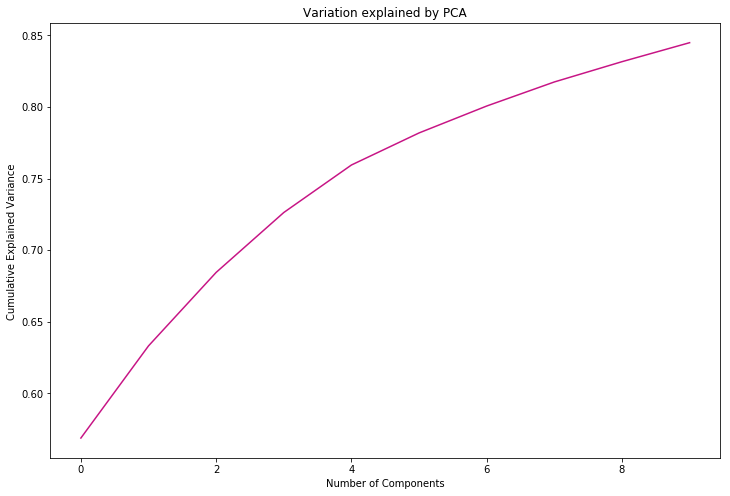

In [79]:
#visualise PCA-explained variation

plt.plot(np.cumsum(pca.explained_variance_ratio_), color = 'mediumvioletred')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance ')
plt.title('Variation explained by PCA')

# interestingly, 4 components explained just over 75% of variance

Text(0.5,1,'Variation ratio explained by PCA')

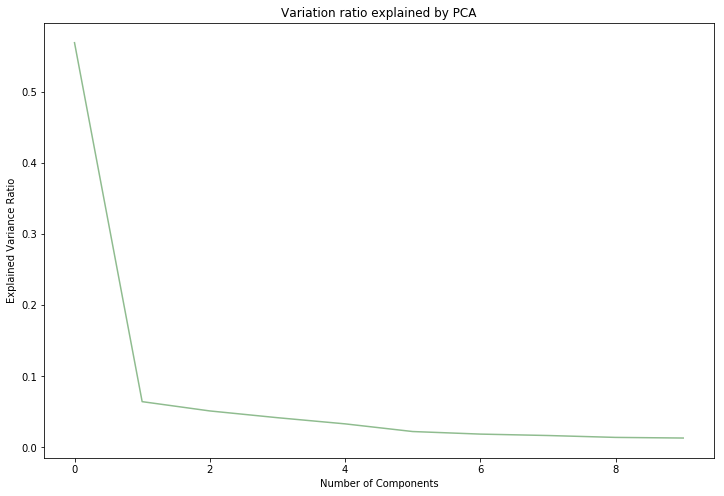

In [80]:
plt.plot((pca.explained_variance_ratio_), color = 'darkseagreen')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Variation ratio explained by PCA')

<div class = "alert alert-info">

**Feature Transformation**


<p> I considered whether feature transformation on  particular features such as influence, gender breakdown and age breakdown would be useful. Having explored transforming various features, I find that no transformation was particularly useful, and omitted the analysis to save space. </p>

</div>

**Preprocessing**

Before we can run any models on our dataset, I must make sure it is prepared and cleaned to avoid errors in results. This stage is generally refered to as preprocessing.

To begin with, I need to deal with missing data in the dataframe - the ML algorithm will not be able to process NaN or missing values. 

For this study, we will be imputing missing numerical values, and filling any one which we were not able to imput, with 0.

In [81]:
# Handle missing values using imputer. Execute imputer separately on master training and test dataframes

from sklearn.preprocessing import Imputer

#for master train set

impute = Imputer(missing_values='NaN', strategy='mean', axis=1)
df_imputer_train = pd.DataFrame(impute.fit_transform(master_train_set))
df_imputer_train.columns = master_train_set.columns
df_imputer_train.index = master_train_set.index

df_imputer_train.head()



/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


,streams_count_per_artist,number of unique streamers per artist,passion_score_final,percentage of female streamers,% of youth,% of young adults,% of adults,Playlist Passion Score,Successful Artist or Not,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10
17 Memphis,12.0,12.0,1.000000,0.666667,0.200000,0.400000,0.300000,0.031250,0.0,-1066.030104,-8.449366,-21.765807,-7.491672,4.317912,-6.598770,1.340678,-1.049194,0.060992,0.699383
99 Percent,1291.0,1189.0,1.085786,0.677926,0.339212,0.366183,0.175311,0.458733,0.0,-876.608664,-20.707568,-33.802313,-16.558912,0.168555,-2.662221,1.100423,2.711004,0.515492,-1.830186
A Boogie Wit Da Hoodie,9904.0,7713.0,1.284066,0.273748,0.191162,0.516763,0.233999,0.362968,0.0,1195.401131,468.282362,222.532572,17.367009,-5.795103,-16.910525,28.538175,19.079896,12.250924,-21.050765
A Boogie Wit da Hoodie,13264.0,11154.0,1.189170,0.318605,0.279433,0.437202,0.199237,0.454769,1.0,326.689102,-507.510048,478.979715,-84.016157,-57.294053,18.983290,-33.768814,31.422452,7.235614,34.985667
A R I Z O N A,68830.0,58987.0,1.166867,0.521963,0.129727,0.402716,0.355355,0.333574,1.0,9160.499942,-584.878448,93.611835,573.275760,-214.647777,234.952019,41.561658,-87.234877,296.069304,-114.536150


In [82]:
#for master test set

#impute = Imputer(missing_values='NaN', strategy='mean', axis=1)
df_imputer_test = pd.DataFrame(impute.fit_transform(master_test_set))
df_imputer_test.columns = master_test_set.columns
df_imputer_test.index = master_test_set.index
df_imputer_test = df_imputer_test.drop('streams_count_per_artist', axis = 1)

df_imputer_test.head()

,number of unique streamers per artist,passion_score_final,percentage of female streamers,% of youth,% of young adults,% of adults,Playlist Passion Score,Successful Artist or Not,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10
#90s Update,15.0,1.066667,0.437500,0.076923,0.230769,0.615385,0.051013,0.0,-1064.361806,-7.434001,-21.618842,-7.202030,4.095893,-6.748749,0.933668,-0.872956,-0.396088,0.447215
AGWA,3.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.0,-1067.217986,-8.295809,-21.709381,-7.976221,4.467162,-6.415712,0.415944,-0.607453,0.057300,1.009670
Adan Carmona,12.0,1.166667,0.500000,0.000000,0.222222,0.777778,0.170635,0.0,-1063.787393,-6.420513,-21.857666,-7.174886,4.471635,-6.026823,0.357345,-0.898505,-0.177646,0.599773
Alex Roy,3.0,1.000000,1.000000,0.000000,0.000000,1.000000,0.170635,0.0,-1066.488811,-7.641579,-21.857347,-7.617523,4.423573,-6.285065,0.398114,-0.771238,0.016631,0.754984
Alexander Brown,141.0,1.042553,0.369863,0.022727,0.257576,0.553030,0.118699,0.0,-1028.173626,2.066334,-21.525637,-3.827187,4.449258,-4.086906,3.009670,-1.857250,1.357304,0.889887


Next, we need to make sure that none of the variables going into the model are collinear, and if so, we need to remove those variables that are highly correlated.

<div class = "alert alert-info">
<b>Multi-collinearity </b> 

<p> I will check and deal with multi-collinearity in my feature set.</p>

</div>

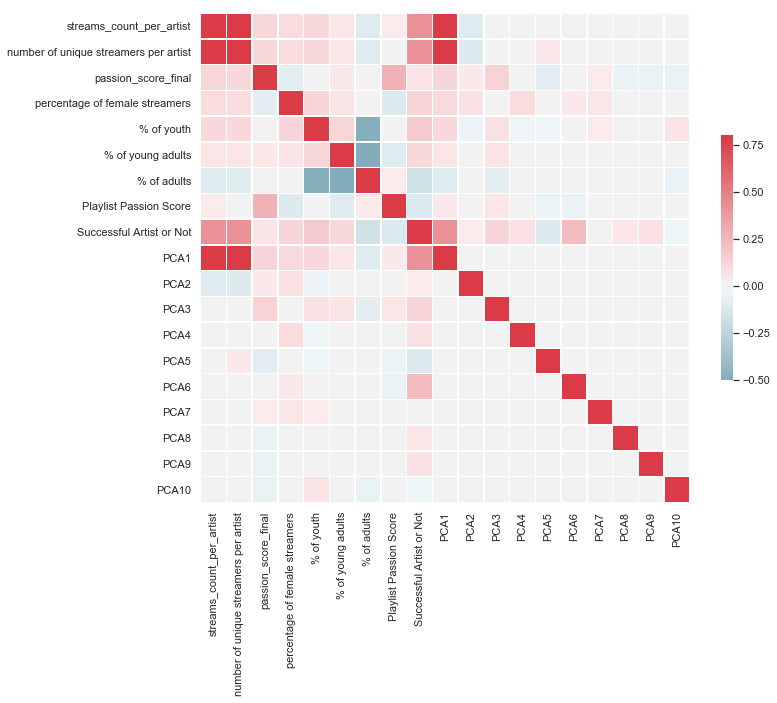

In [83]:
# We can create a correlation matrix to better understand the correlations between variables, as opposed to just viewing raw figures

import seaborn as sns

sns.set(style="whitegrid")

# Compute the correlation matrix
training_corr = df_imputer_train.corr()

# Set up plot figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw heatmap
sns.heatmap(training_corr, cmap=cmap, vmin = -0.5, vmax=0.8, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})


<div class = "alert alert-info">
   
*I see that stream count per artist is highly correlated with PCA1 and number of unique streamers per artist. I will drop this variable.*

*Other than that, there are no particulary strong correlations we need to be worried about*

<div>

In [84]:
df_imputer_train = df_imputer_train.drop('streams_count_per_artist', axis = 1)

Finally, we want to take a look out the **class balance** in our dependent variable.

Given the natural bias in our data, i.e. there are more cases of failure than of success in the training and test sets; there is a strong bias toward predicting ‘failure’. Based on our complete (unbalanced classes) training sample, if the model only predicted ‘failure’, we would achieve an accuracy of 88.8%. 

To give us a more even class balance, without losing too much data, we will sample data from the bigger class to achive a class balance closer to 60-40. 

There is another way to determine the accuracy of our predictions using a confusion matrix and ROC curve, but more on that later. For now, we will go ahead with sampling the bigger class:

<div class = "alert alert-info">
  
**Sampling Techniques and why they are necessary**  

*In my master training set, 40% of our cases must be successful, and the remaining 60% unsuccessful. Given that, after the train-test split, we
have 53 successful artists in our training set, our unsuccessful artists must be [(53/0.4) - 53] = 80. We can obtain a random sample to get these
80 artists.*


*However, the problem we face here would be that the training sample would be too small, and will likely perform poorer than if the sample size were larger. To get around this problem, we can oversample the minority class. I conduct this below*

</div>

In [85]:
ultimate_unsuccessful = df_imputer_train[df_imputer_train['Successful Artist or Not'] == 0] # unsuccessful unique artists
ultimate_successful = df_imputer_train[df_imputer_train['Successful Artist or Not'] == 1] # successful unique artists
ultimate_ultimate_train = pd.concat([ultimate_successful, ultimate_unsuccessful]) #get all unique artists from master imputer training data set

In [86]:
# Create class count
count_class_boo, count_class_woo =  ultimate_ultimate_train['Successful Artist or Not'].value_counts()

# Subdivide by class

df_class_boo = ultimate_ultimate_train[ultimate_ultimate_train['Successful Artist or Not']==0]
df_class_woo = ultimate_ultimate_train[ultimate_ultimate_train['Successful Artist or Not']==1]

#oversample minority class (Success == 1)

df_class_woo_oversampled = df_class_woo.sample(count_class_boo, replace = True)
ultimate_train_df = pd.concat([df_class_boo, df_class_woo_oversampled], axis = 0)

print(ultimate_train_df['Successful Artist or Not'].value_counts())

1.0    276
0.0    276
Name: Successful Artist or Not, dtype: int64


<div class = "alert alert-info">
    
*Now we have a much better dataset in terms of its size and class balance. Of course, there is the possibility that by oversampling from the minority (successful) class, I may have increased the chances of overfitting. If this is the case, then my model will perform poorly. The following steps will yield the answer to this predicament*

</div>

## 4.	Evaluate algorithms 

** Model Selection **

There are number of classification models available to us via the **`scikit-learn`** package, and we can rapidly experiment using each of them to find the optimal model.

Below is an outline of the steps we will take to arrive at the best model:

*	Split data into training and validation (hold-out) set
*	Use cross-validation to fit different models to training set
*	Select model with the highest cross-validation score as model of choice
*	Tune hyper parameters of chosen model.
*	Test the model on hold-out set

In [87]:
ultimate_train_df.head(2)

,number of unique streamers per artist,passion_score_final,percentage of female streamers,% of youth,% of young adults,% of adults,Playlist Passion Score,Successful Artist or Not,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10
17 Memphis,12.0,1.000000,0.666667,0.200000,0.400000,0.300000,0.031250,0.0,-1066.030104,-8.449366,-21.765807,-7.491672,4.317912,-6.598770,1.340678,-1.049194,0.060992,0.699383
99 Percent,1189.0,1.085786,0.677926,0.339212,0.366183,0.175311,0.458733,0.0,-876.608664,-20.707568,-33.802313,-16.558912,0.168555,-2.662221,1.100423,2.711004,0.515492,-1.830186


<div class="alert alert-info">
    
*We must turn our training and test data into arrays, which can be used in our classifiers*

</div>

In [88]:
y_train = pd.DataFrame(ultimate_train_df['Successful Artist or Not'])
y_train = y_train.values

In [89]:
x_train = pd.DataFrame(ultimate_train_df.drop('Successful Artist or Not', axis = 1))
x_train = x_train.values

In [90]:
x_test = pd.DataFrame(df_imputer_test.drop('Successful Artist or Not', axis = 1))
x_test = x_test.values

In [91]:
y_test = pd.DataFrame(df_imputer_test['Successful Artist or Not'])
y_test = y_test.values

<div class="alert alert-info">
  
*Now we will loop through different classifiers and compute the cross-validation score of each. This will determine the best performing model, which we can then target for hyperparameter tuning*
 
</div>

In [92]:
from sklearn import model_selection
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

#choose classifiers to test

classifiers = [
    KNeighborsClassifier(),
    SVC(kernel="rbf", C=0.025, probability=True, gamma ='scale'),
    NuSVC(probability=True, gamma ='scale'),
    DecisionTreeClassifier(random_state = 42),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    LogisticRegression(),
    RandomForestClassifier()]

# make a dataframe to display outputs
log_cols=["Classifier", "Accuracy"]
log = pd.DataFrame(columns=log_cols)

# test each classifier in turn

for clf in classifiers:
    model = clf.fit(x_train, y_train)
    name = clf.__class__.__name__
    
    kfold = model_selection.KFold(n_splits=10, random_state=7)
    score = model_selection.cross_val_score(model, x_train, y_train, cv=kfold)
    m_score = np.mean(score)
    
    log_entry = pd.DataFrame([[name, m_score*100]], columns=log_cols)
    log = log.append(log_entry)


log.index = range(len(log))
log

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:32: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape 

,Classifier,Accuracy
0,KNeighborsClassifier,85.363636
1,SVC,10.181818
2,NuSVC,79.834416
3,DecisionTreeClassifier,94.782468
4,GaussianNB,81.103896
5,LinearDiscriminantAnalysis,65.383117
6,LogisticRegression,82.207792
7,RandomForestClassifier,95.850649


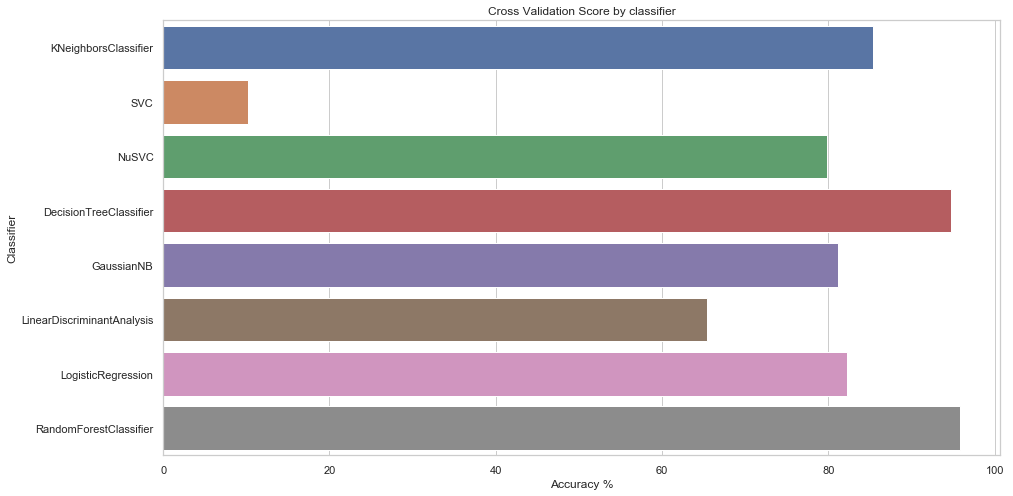

In [93]:
# plot results for easier understanding

plt.figure(figsize=(15,8))
sns.set_color_codes("bright")
sns.barplot(x='Accuracy', y='Classifier', data=log)

plt.xlabel('Accuracy %')
plt.title('Cross Validation Score by classifier')
plt.show()


<div class="alert alert-success">

**Best classifier:**

*The best classifier is **Random Forests**, with a cross-validation score of 96%, which is very impressive. I can attempt to tune it further, but even if I am unable to improve its performance significantly, the model's current performance is good enough to be tested on the test set*

</div>

## 5. Improve Results 

<div class = "alert alert-info">
<b>Hyper Parameter Tuning  </b> 

<p> I will perform hyperparameter turing and demonstrate improved performance and comment on any specific behaviour of my chosen classifier and set out the final structure and parameter settings.</p>

</div>

In [94]:
# Using grid search to iterate through combinations of hyperparameter values for Random Forests

from sklearn.model_selection import GridSearchCV

#chosen parameters to manipulate

parameter_grid = {'bootstrap': [True, False], 'max_depth': [int(x) for x in np.linspace(1, 18, num = 11)], 'max_features':['auto', 'sqrt'],
                     'n_estimators':[int(x) for x in np.linspace(start = 20, stop = 200, num = 10)], 'min_samples_split':[2, 5, 10],
                     'min_samples_leaf':[1, 2, 4]}

RF = RandomForestClassifier(random_state = 42)

# execute grid search

grid_search = GridSearchCV(estimator = RF, param_grid = parameter_grid, cv = 3,  n_jobs = -1, verbose = 2)


# show CV score

print('Random Forests CV score: ')
grid_search.fit(x_train, y_train) 
print(grid_search.best_params_) # show best parameters
print(grid_search.best_score_) # display score associated with said parameters

Random Forests CV score: 
Fitting 3 folds for each of 3960 candidates, totalling 11880 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   12.7s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:   23.2s
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:   36.5s
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed:   53.9s
[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 3265 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 4885 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 5816 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 6829 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 7922 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 9097 tasks      | e

{'bootstrap': False, 'max_depth': 9, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 60}
0.9710144927536232


[Parallel(n_jobs=-1)]: Done 11880 out of 11880 | elapsed:  7.2min finished
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:715: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


<div class = "alert alert-info">
    
*Hyperparameter tuning has led to an increase in cross-validation score of 0.7% approximately. Since the model performed well in the first place, we should not be too worried about this insignificant magnitude of increase*

</div>

In [95]:
# Run the model again, this time manually inputting the best parameters found by the grid search to confirm the cross validation score

RF1 = RandomForestClassifier(random_state = 42, bootstrap = False, max_depth = 11, max_features = 'auto', min_samples_leaf =1
                             ,min_samples_split = 2, n_estimators = 40)

kfold_RF = model_selection.KFold(n_splits=10, random_state=42) # 10 folds

cv_result_RF = model_selection.cross_val_score(RF1, x_train, y_train, cv=kfold)

print("CV score: {:.4%}".format(cv_result_RF.mean())) # print mean of CV scores across 10 folds

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y wa

CV score: 97.8377%


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


<div class = "alert alert-info">
<b> Ensemble modeling  </b> 

<p> I will now build an ensemble model and demonstrate improved performance. I will comment on  specific behaviour of my chosen classifier and set out the final structure and parameter settings.</p>

</div>

In [96]:
# Since I have chosen Random Forests as my model, I will attempt to use AdaBoostClassifier to see whether I can further improve CV score

from sklearn.ensemble import AdaBoostRegressor

RF1_Ada = AdaBoostRegressor(RF1, n_estimators=400, random_state=42)

kfold_RF1_Ada = model_selection.KFold(n_splits=10, random_state=42)
cv_result_RF1_Ada = model_selection.cross_val_score(RF1_Ada, x_train, y_train, cv=kfold_RF1_Ada)

print("CV score: {:.4%}".format(cv_result_RF1_Ada.mean()))



/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

CV score: 29.4444%


<div class = "alert alert-info">
    
 *Clearly, this model performs very badly. In this instance I used my tuned Random Forest model. It would be a good idea to test AdaBoost using:*
 
 - *an untuned Random Forest model (to check if my hyperparameter tuning is playing a role in decreasing CV score)*
 - *an untuned Decision Tree model (since this model was the second best performing in terms of CV score)*
 
 
*I do each in turn below.*

</div>

In [97]:
RF_Ada = AdaBoostRegressor(RF, n_estimators=100, random_state=42)

kfold_RF_Ada = model_selection.KFold(n_splits=10, random_state=42)
cv_result_RF_Ada = model_selection.cross_val_score(RF_Ada, x_train, y_train, cv=kfold_RF_Ada)

print("CV score: {:.4%}".format(cv_result_RF_Ada.mean()))

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages

CV score: 39.6296%


/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


<div class = "alert alert-info">
    
*Performance is still very poor. Let us try using AdaBoost with Decision Trees*

</div>

In [98]:
from sklearn.tree import DecisionTreeRegressor

DT_Ada = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4), n_estimators=300, random_state=42)
kfold_DT_Ada = model_selection.KFold(n_splits=10, random_state=42)
cv_result_DT_Ada = model_selection.cross_val_score(DT_Ada, x_train, y_train, cv=kfold_DT_Ada)

print("CV score: {:.4%}".format(cv_result_DT_Ada.mean()))

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

CV score: -21.0642%


<div class = "alert alert-success">
    
*Once more, our hypertuned Random Forest classifier ("RF1") remains the best performing model. I am unsure as to why ensemble methods are decreasing the performance by such a great degree. But for now, I will test RF1 on the hold-out set*

</div>

## 6. Present Results

### Confusion Matrix

To get a better idea of the quality of our predictions, we can plot a confusion matrix and ROC curve. 


A confusion matrix is a technique for summarizing the performance of a classification algorithm that allows visualization of the performance of an algorithm. 

Each row of the matrix represents the instances in a predicted class while each column represents the instances in an actual class (or vice versa). 

The confusion matrix shows the ways in which your classification model is confused when it makes predictions. It gives you insight not only into the errors being made by your classifier but more importantly the types of errors that are being made.

<div class = "alert alert-info">
    
*First, we need to test our trained model (named RF1, whose parameters have been tuned through grid search) on the test set. Once this is done, we can compare the predictions of our model ("y_predicted") against the actual outputs in the test set ("y_test") by plotting a confusion matrix*

</div>

In [99]:
RF1.fit(x_train, y_train) # fit model on training data
y_predicted = RF1.predict(x_test) # predict outputs using test data inputs
accuracy = accuracy_score(y_test, y_predicted) # compare predicted outputs with actual test data outputs

print("accuracy: {:.4%}".format(accuracy))

accuracy: 87.2340%


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


<div class = "alert alert-success">
    
*When tested on the hold-out set, our model gives an accuracy of 87%, which is good but not great. A likely reason for this is that, unlike in my training set, I did not oversample the minority ('Success') case in my test set. This means the number of 'Success' cases is very small relative to the 'Unsuccessful' cases.*

*I will try and support this hypothesis using a confusion matrix*

</div>

[[104   6]
 [ 12  19]]


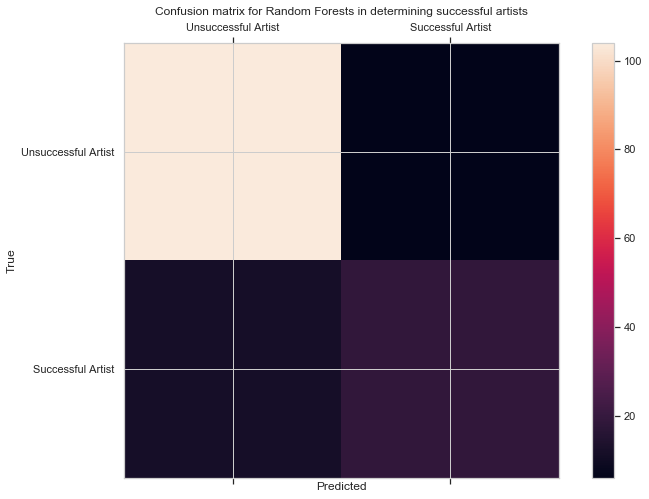

In [100]:
# Plot Confusion Matrix

from sklearn.metrics import confusion_matrix

# Compute confusion matrix

labels = ['Unsuccessful Artist', 'Successful Artist']
cm = confusion_matrix(y_test, y_predicted)
print(cm)

# create figure

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix for Random Forests in determining successful artists')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()



<div class = "alert alert-info">
    
*The confusion matrix supports my idea outlined above. My model can identify the Unsuccessful (True Negative) cases very accurately. However, it does not do as well at identifying the Successful (True Positives) ones.*

<br>

*Again, I believe this is because of my small test sample size and even smaller number of 'Success' cases within that sample.  This is further supported by the fact that my model does not fall into the trap of False Positives and False Negatives. I had considered oversampling in my test set. However, in my research, I found conflicting opinions as to whether this would be 'valid'.*

<br> 

*As a result, I decided not to change my test set. I have confidence that the reason I identified above is valid and that, with a larger dataset, my model would show its true performance*

</div>

### ROC Curve 

Receiver Operating Characteristic (ROC) curves show the ability of the model to classify subjects correctly across a range of decision thresholds, i.e. it plots the True Positive Rate vs. False Positive Rate at every probability threshold. 

The AUC summarizes the results of an ROC – it is the probability that a randomly chosen ‘success’ example has a higher probability of being a success than a randomly chosen ‘failure’ example. A random classification would yield an AUC of 0.5, and a perfectly accurate one would yield 1.


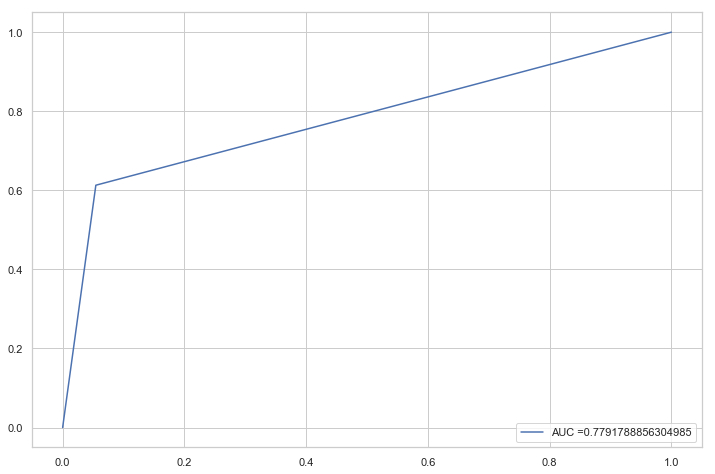

In [101]:
# ROC curve

from sklearn.metrics import roc_auc_score
from sklearn import metrics

fpr, tpr, _ = metrics.roc_curve(y_test, y_predicted)
auc = roc_auc_score(y_test, y_predicted)


# Plot classifier ROC

plt.plot(fpr, tpr, label = 'AUC =' + str(auc))
plt.legend(loc = 4)
plt.show()



# Using our model, we obtain an AUC of 78%

Now that you have a validated model, we can potentially analyze the features of the model, to understand which ones have had the most impact on predicting an artist’s success. 

To do this, we can plot the feature importance as determined by the classifier:

<div class = "alert alert-info">
<b>Feature importance</b> 

<p> I will comment on the feature selection and performance of my final algorithm.</p>

</div>

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


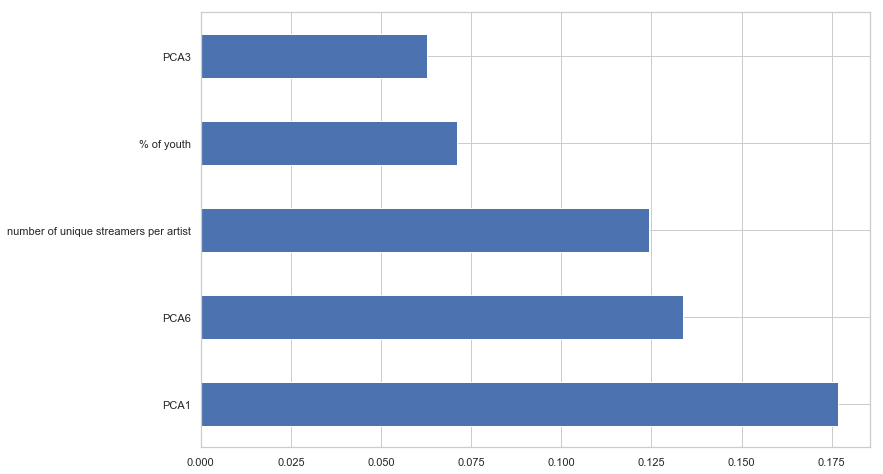

In [102]:
# Feature importance analysis 

x_train_df = pd.DataFrame(ultimate_train_df.drop('Successful Artist or Not', axis = 1))

Final_Model = RF1
Final_Model.fit(x_train, y_train)
Final_Model.score(x_test, y_test)

(pd.Series(Final_Model.feature_importances_, index = x_train_df.columns).nlargest(5).plot(kind = 'barh'))



<div class = "alert alert-success">

*By far, the most important feature is PCA1, which is to be expected as the first principal component captures the maximum amount of variance in the data.*

<br>

*In addition, the number of (unique) streamers an artist has is a strong predictor of their success. Earlier, at the beginning of this project, we saw an indication that the number of streams per playlist was not an extremely powerful feature (according to Warner analysts). We may have thought that a closely related variable, i.e number of unique stremers per artist, could be similarly unimportant.*

<br> 

*However, this is proven to be wrong as evidenced by the barplot. It is intuitive that a greater number of different people liking a certain artist will encourage that artist's music to be spread across multiple playlists. This, in turn, is predictive of them appearing on certain (i.e our success) playlists.*

</div>

## Summary 

Please provide summaries the work completed and the outcomes of the analysis 

<div class = "alert alert-success">
    
- **Business problem and potential importance of solution**

In the music industry, finding and securing contracts with emerging artists who will become very successful is a major goal. This is because record labels can increase profitability significantly by signing an artist just before they become successful, since the terms of this contract will be favourable to the record label as the artist will not be very famous yet. Using a machine learning model, we endeavour to predict which artists will end up being successful as measured by their presence/absence on 1 or more of 4 key playlists. Thus, this is a classification task. 

<br> 

- **Visualisaton**

We created a multitude of bar graphs, lollipop graphs and histograms to get a better feel of the data. These chart types dominated the visualisaiton aspect since most of the pre-engineered features were categorical. We found, among other insights, the slight skew in terms of age for customers and the interesting omission of the most played playlists from the 4 target playlists. There was also a seasonal and weekly component to what songs/genres, and by extension what artists, were popular.

<br> 

- **Quantifying influence and other variables**

The majority of the analysis took place here, since the raw data and features were not suited to ML algorithms. Features were divided into Artist, Playlist and User levels. In the first category, we created a measure of how passionate an artist's fans were through the measure of repeated streams, called 'Passion Score'. A similar feature was created for the second category. For the final category, we built a gender and age level audience profile per artist, to see if demographics had any major effect on predicting success.

<br> 

- **Preparing data for ML algorithm**

The key tasks completed here included splitting the data, checking for correlations, executing PCA, filling missing values with the Imputer class and dealing with class balance. PCA was executed on region codes to incorporate a geographical aspect into predicting success and to extract the most important data from 600+ region codes. The first such principal component turned out to be the most powerful predicitve feature. 

Additionally, class balance initially proved to be an issue, since there were many more unsuccessful cases than successful ones in our data, especially after the training-test split. To overcome this, we oversampled the successful cases (in only training set) and included the necessary caveats that this oversampling entailed.

<br> 

- **Finding best-performing ML algorithm and tuning it**

Iterating through a multitude of classifiers, Decision Trees and Random Forests were found to be the best performing in terms of cross-validation scores. We choose the latter in tuning hyperparameters via grid search, and ended with a cross-validation score of 97%. Further attempts to using ensemble methods with our model (which by itself, of course, is an ensemble method) with AdaBoost yielded large decreases in performance, so such methods were not incorporated into the model.

<br> 

- **Results**

Testing our model on the hold-out set resulted in an accuracy of 87%, which is good but not great, as it can still lead to WarnerMusic missing out on potentially successful artists. We believe the reason why the model cannot break the 90% barrier is the very small hold-out set size, with even fewer successful cases. Our Confusion Matrix seems to confirm this. Oversampling was not executed on this hold-out set. Using ROC, the area under the curve is 78%, while the most important features are geographical (first principal component), number of unique streamers per artist and % of youth streamers. Thus, if an artist is popular among a multitude of young streamers, they are more likely to be successful.

<br> 

</div>

